In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import os
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']
val_ratio=0.1


x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

val_size = int(len(x_train) * val_ratio)
x_val = x_train[:val_size]
y_val = y_train[:val_size]

x_train = x_train[val_size:]
y_train = y_train[val_size:]


In [2]:
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]


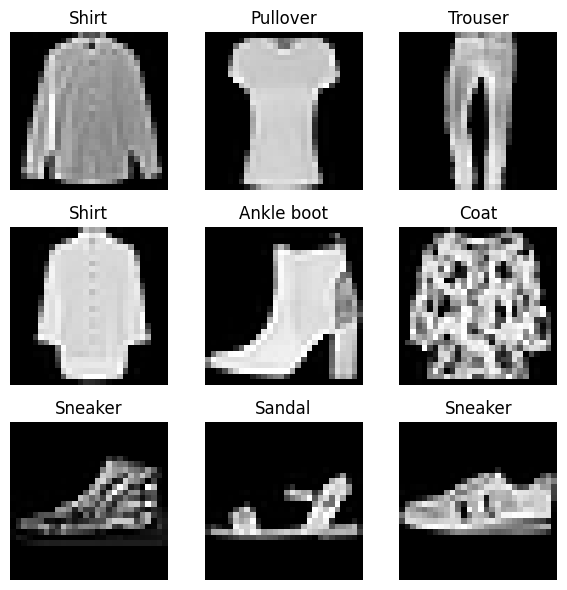

In [3]:

plt.figure(figsize=(6, 6))
for i in range(9): 
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
def build_cnn(input_shape=(28,28,1), num_classes=10):
    model = Sequential()

    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation='softmax'))

    return model


In [5]:
def plot_history(history, out_path_acc=None, out_path_loss=None):

    plt.figure()
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.legend()
    plt.title("Accuracy Curve")
    plt.savefig(out_path_acc)
    plt.close()

    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.title("Loss Curve")
    plt.savefig(out_path_loss)
    plt.close()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = build_cnn(input_shape=(28, 28, 1), num_classes=10)
OUTPUT_DIR = "../results"

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)
datagen.fit(x_train)

callbacks = [
    EarlyStopping(patience=7, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint("../saved_model/best_model.h5", save_best_only=True),
    ReduceLROnPlateau(patience=2, factor=0.3, monitor="val_loss"),
]

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=40,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)
plot_history(history,
                 out_path_acc=os.path.join(OUTPUT_DIR, "accuracy_curve.png"),
                 out_path_loss=os.path.join(OUTPUT_DIR, "loss_curve.png")
                 )

print("Model saved successfully!")

